# CREDIT CARD EDA

PSPD Bank, operating in over 50 countries, faces challenges in bankruptcy prediction, fraud prevention, collections optimization, and proactive customer support. To address these issues, the CEO, Mr. Jim Watson, seeks to employ dynamic data-driven tools and procedures for comprehensive data analysis and decision-making in the credit card industry.In this assignment, the datasets would be explored and insights will be gathered. 

In [1]:
# Getting required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# Load the data from the Excel file
repayment = pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets for ML\\EDA\\Repayment.csv')
spend = pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets for ML\\EDA\\spend.csv')
cust_acq = pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets for ML\\EDA\\Customer Acqusition.csv')
ccdata = pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets for ML\\EDA\\Credit Card Data.xlsx')

In [61]:
#examining the first dataset
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [62]:
#renaming the amount column
repayment.rename(columns={'Amount': 'amount_repaid'}, inplace=True)
repayment.head()

,SL No:,Customer,Month,amount_repaid,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [63]:
#examining the second dataset
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [64]:
#renaming the amount column
spend.rename(columns={'Amount': 'amount_spent'}, inplace=True)
spend.head()

,Sl No:,Customer,Month,Type,amount_spent
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [65]:
#examining the third dataset
cust_acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [66]:
#examining the fourth dataset
ccdata.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary


In [67]:
# Merging the  DataFrames
merged_df = pd.merge(repayment, cust_acq, on='Customer', how='inner') 

merged_df = pd.merge(merged_df, spend, on='Customer', how='inner')

merged_df = pd.merge(merged_df, ccdata, on='Customer', how='inner')


In [68]:
#examining the new dataset
merged_df.head()

,SL No:,Customer,Month_x,amount_repaid,Unnamed: 4,No_x,Age_x,City_x,Product_x,Limit_x,...,Month_y,Type,amount_spent,No_y,Age_y,City_y,Product_y,Limit_y,Company_y,Segment_y
0,NaN,A1,12-Jan-04,495414.75,NaN,1,76,BANGALORE,Gold,500000.0,...,12-Jan-04,JEWELLERY,485470.80,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,NaN,A1,12-Jan-04,495414.75,NaN,1,76,BANGALORE,Gold,500000.0,...,3-Jan-04,PETRO,410556.13,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
2,NaN,A1,12-Jan-04,495414.75,NaN,1,76,BANGALORE,Gold,500000.0,...,15-Jan-04,CLOTHES,23740.46,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
3,NaN,A1,12-Jan-04,495414.75,NaN,1,76,BANGALORE,Gold,500000.0,...,25-Jan-04,FOOD,484342.47,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
4,NaN,A1,12-Jan-04,495414.75,NaN,1,76,BANGALORE,Gold,500000.0,...,17-Jan-05,CAMERA,369694.07,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed


In [69]:
#seeing the datatypes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SL No:         37266 non-null  float64
 1   Customer       37284 non-null  object 
 2   Month_x        37284 non-null  object 
 3   amount_repaid  37284 non-null  float64
 4   Unnamed: 4     0 non-null      float64
 5   No_x           37284 non-null  int64  
 6   Age_x          37284 non-null  int64  
 7   City_x         37284 non-null  object 
 8   Product_x      37284 non-null  object 
 9   Limit_x        37284 non-null  float64
 10  Company_x      37284 non-null  object 
 11  Segment_x      37284 non-null  object 
 12  Sl No:         37284 non-null  int64  
 13  Month_y        37284 non-null  object 
 14  Type           37284 non-null  object 
 15  amount_spent   37284 non-null  float64
 16  No_y           37284 non-null  int64  
 17  Age_y          37284 non-null  float64
 18  City_y

In [70]:
#removing the redundant columns
merged_df=merged_df.drop(['SL No:','Sl No:','Unnamed: 4','No_x','Age_x','City_x','Product_x','Limit_x','Company_x','Segment_x','Month_x'],axis=1)
merged_df.head()

,Customer,amount_repaid,Month_y,Type,amount_spent,No_y,Age_y,City_y,Product_y,Limit_y,Company_y,Segment_y
0,A1,495414.75,12-Jan-04,JEWELLERY,485470.80,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,A1,495414.75,3-Jan-04,PETRO,410556.13,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
2,A1,495414.75,15-Jan-04,CLOTHES,23740.46,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
3,A1,495414.75,25-Jan-04,FOOD,484342.47,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
4,A1,495414.75,17-Jan-05,CAMERA,369694.07,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed


In [71]:
#renaming the columns
merged_df.rename(columns={'Month_y': 'Date','No_y': 'ID','Age_y': 'Age','City_y': 'City','Product_y': 'Product','Limit_y': 'Limit','Company_y': 'Company','Segment_y': 'Segment'}, inplace=True)
merged_df.head()

,Customer,amount_repaid,Date,Type,amount_spent,ID,Age,City,Product,Limit,Company,Segment
0,A1,495414.75,12-Jan-04,JEWELLERY,485470.80,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,A1,495414.75,3-Jan-04,PETRO,410556.13,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
2,A1,495414.75,15-Jan-04,CLOTHES,23740.46,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
3,A1,495414.75,25-Jan-04,FOOD,484342.47,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
4,A1,495414.75,17-Jan-05,CAMERA,369694.07,1,34.012349,BANGALORE,Gold,500000,C1,Self Employed


In [73]:
#data cleaning and formatting 
merged_df['ID'] = merged_df['ID'].astype(str)

merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%b-%y')

In [74]:
#replacing ages less than 18 with the mean of age values
mean_age = merged_df['Age'].mean()
merged_df['Age'] = merged_df['Age'].apply(lambda x: mean_age if x < 18 else x)

In [75]:
#replacing spend amounts exceeding the limit with 50% of the customer's limit
merged_df['amount_spent'] = merged_df.apply(lambda row: row['Limit'] * 0.5 if row['amount_spent'] > row['Limit'] else row['amount_spent'], axis=1)


In [76]:
#replacing repayment amounts exceeding the limit with the limit
merged_df['amount_repaid'] = merged_df.apply(lambda row: row['Limit'] if row['amount_repaid'] > row['Limit'] else row['amount_repaid'], axis=1)

In [77]:
#checking Distinct customers
distinct_customers = merged_df['Customer'].nunique()
print("Distinct customers:", distinct_customers)

Distinct customers: 100


In [78]:
#checking Distinct Products
distinct_Products = merged_df['Product'].nunique()
print("Distinct Products:", distinct_Products)

Distinct Products: 3


In [80]:
#checking Average monthly spend by customers
average_monthly_spend = merged_df.groupby('Customer')['amount_spent'].mean().mean()
print("Average monthly spend by customers:", average_monthly_spend)

Average monthly spend by customers: 139422.56004424597


In [82]:
#checking Average monthly repayment by customers
average_monthly_repayment = merged_df.groupby('Customer')['amount_repaid'].mean().mean()
print("Average monthly repayment by customers:", average_monthly_spend)

Average monthly repayment by customers: 139422.56004424597


In [86]:
#profit @ monthly interes 2.9 %
merged_df['MonthlyProfit'] = merged_df['amount_repaid'] - merged_df['amount_spent']
positive_profit = merged_df[merged_df['MonthlyProfit'] > 0]
monthly_interest_rate = 0.029
positive_profit['InterestEarned'] = positive_profit['MonthlyProfit'] * monthly_interest_rate
total_profit = positive_profit['InterestEarned'].sum()
print("Profit for the bank for each month:", total_profit)

Profit for the bank for each month: 67038138.27566


C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_14300\3408323354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_profit['InterestEarned'] = positive_profit['MonthlyProfit'] * monthly_interest_rate


In [88]:
#Top 5 product types
top_product_types = merged_df['Product'].value_counts().head(5)
print("Top 5 product types:\n", top_product_types)

Top 5 product types:
 Gold        16220
Platimum    13978
Silver       7086
Name: Product, dtype: int64


In [89]:
#city  having the maximum spend
city_max_spend = merged_df.groupby('City')['amount_spent'].sum().idxmax()
print("City with the maximum spend:", city_max_spend)

City with the maximum spend: COCHIN


In [91]:
#age group is spending most money
bins = [18, 30, 40, 50, 60, 100]  
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)
age_group_spending = merged_df.groupby('AgeGroup')['amount_spent'].sum().idxmax()
print("Age group spending the most:", age_group_spending)

Age group spending the most: 30-39


In [94]:
#Top 10 customers in terms of repayment
top_10_customers_repayment = merged_df.groupby('Customer')['amount_repaid'].sum().nlargest(10).round()
print("Top 10 customers in terms of repayment:\n", top_10_customers_repayment)

Top 10 customers in terms of repayment:
 Customer
A61    400487431.0
A60    375299048.0
A13    296732020.0
A43    263186015.0
A45    261898381.0
A12    258377565.0
A14    246241328.0
A44    240086634.0
A39    236296982.0
A42    236079287.0
Name: amount_repaid, dtype: float64


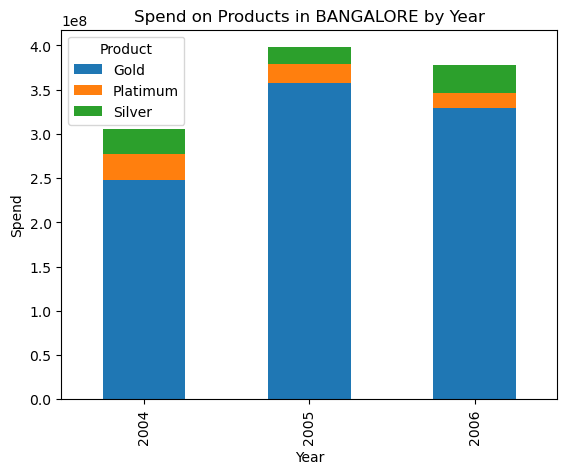

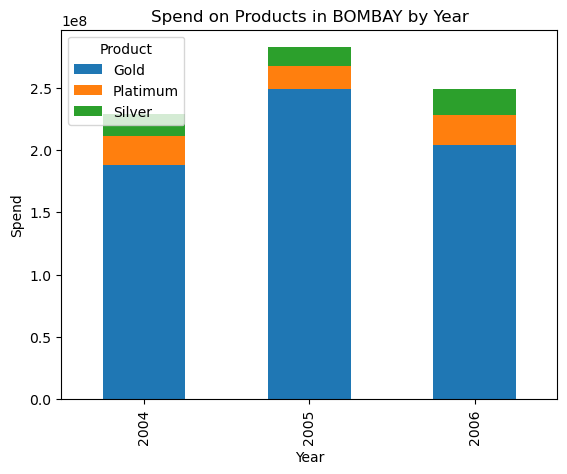

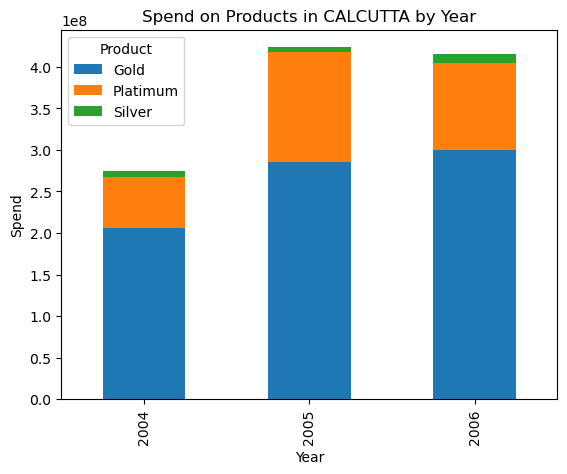

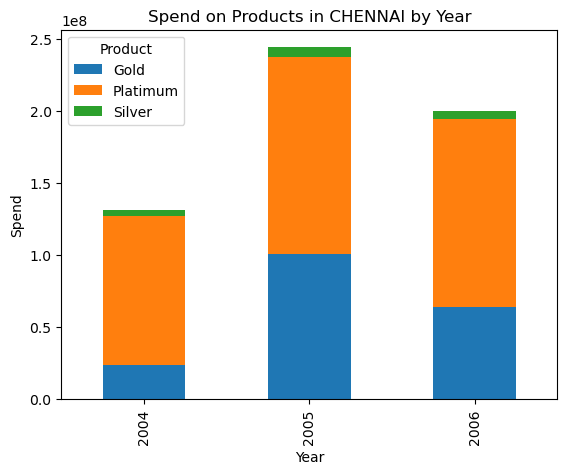

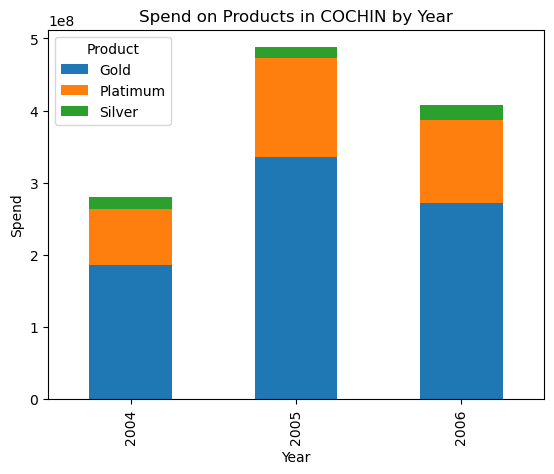

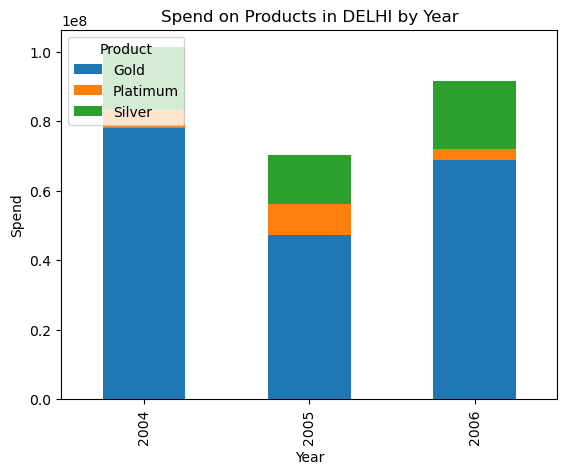

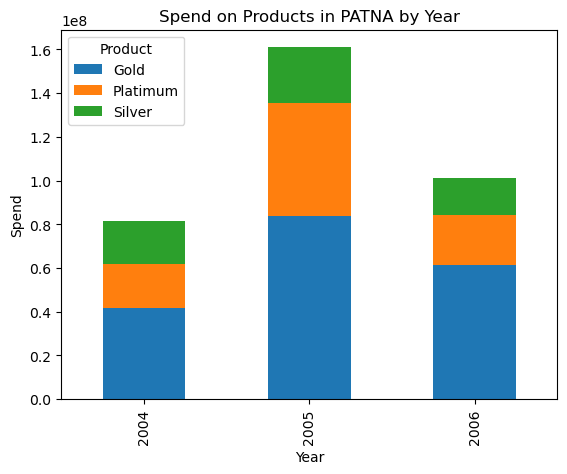

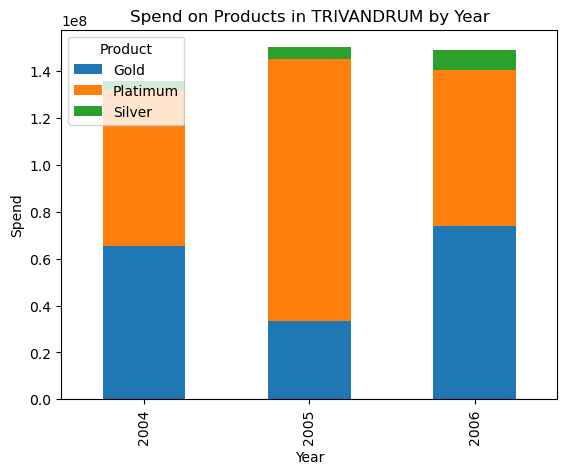

In [97]:
# Create a bar plot for city-wise spend on each product on a yearly basis 
merged_df['Month'] = pd.to_datetime(merged_df['Date'])


merged_df['Year'] = merged_df['Month'].dt.year


city_product_spend = merged_df.groupby(['City', 'Product', 'Year'])['amount_spent'].sum().reset_index()


pivot_table = city_product_spend.pivot_table(index=['City', 'Year'], columns='Product', values='amount_spent', fill_value=0)


cities = pivot_table.index.levels[0]
products = pivot_table.columns
for city in cities:
    city_data = pivot_table.loc[city]
    city_data.plot(kind='bar', stacked=True, title=f'Spend on Products in {city} by Year')
    plt.xlabel('Year')
    plt.ylabel('Spend')
    plt.legend(title='Product', loc='upper left')
    plt.show()

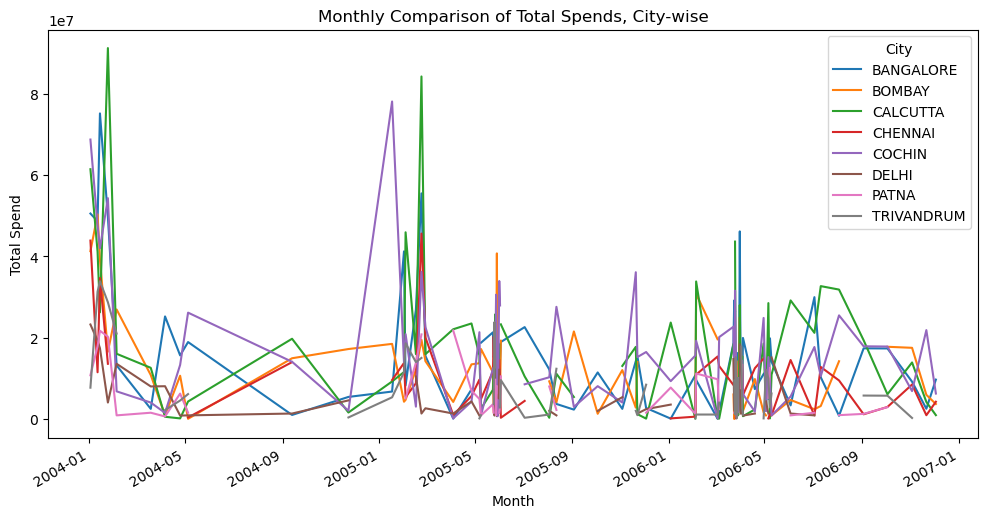

In [99]:
#Monthly comparison of total spends, city-wise

monthly_city_spend = merged_df.groupby(['Month', 'City'])['amount_spent'].sum().unstack()


monthly_city_spend.plot(figsize=(12, 6))
plt.title('Monthly Comparison of Total Spends, City-wise')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.legend(title='City')
plt.show()

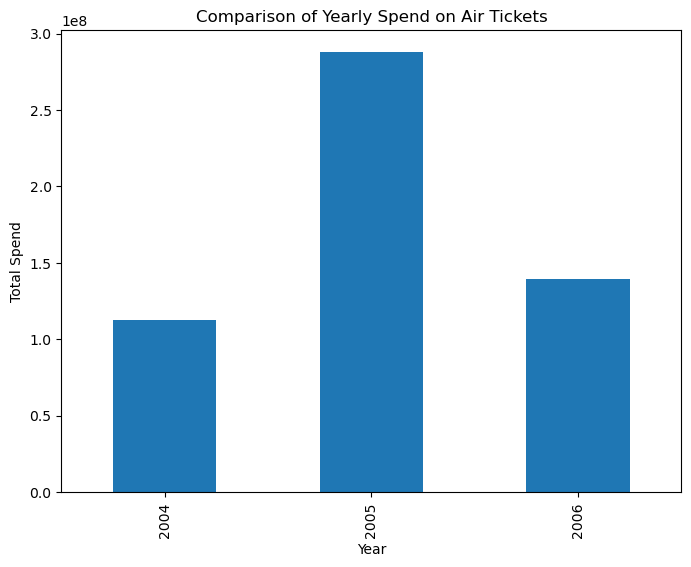

In [104]:
# Comparison of yearly spend on air tickets
air_tickets = merged_df[merged_df['Type'] == 'AIR TICKET']

yearly_air_tickets_spend = air_tickets.groupby('Year')['amount_spent'].sum()


yearly_air_tickets_spend.plot(kind='bar', figsize=(8, 6))
plt.title('Comparison of Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.show()

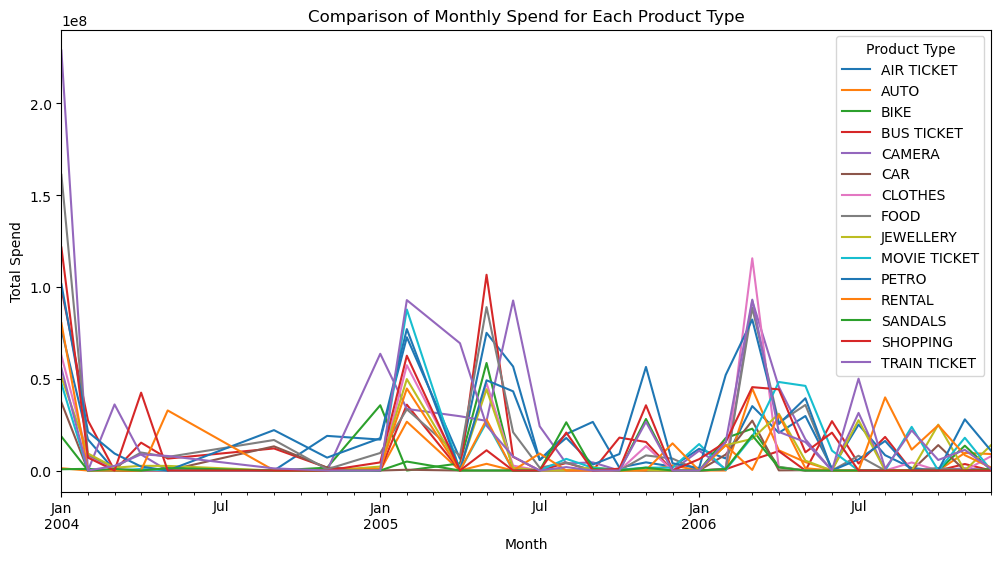

In [111]:
# Comparison of monthly spend for each product Type


monthly_product_spend = merged_df.pivot_table(index='Month', columns='Type', values='amount_spent', aggfunc='sum', fill_value=0)

monthly_product_spend.plot(figsize=(12, 6))
plt.title('Comparison of Monthly Spend for Each Product Type')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.legend(title='Product Type')
plt.show()

In [118]:
#user defined function
def find_top_10_customers(data, city, product, time_period):
   
    filtered_data = merged_df[(merged_df['City'] == city) & (merged_df['Product'] == product)]

    if time_period == 'yearly':
       
        grouped_data = filtered_data.groupby(['Customer', 'Year'])['amount_repaid'].sum().round()
    elif time_period == 'monthly':
      
        grouped_data = filtered_data.groupby(['Customer', 'Month'])['amount_repaid'].sum().round()
    
    
    top_10_customers = grouped_data.groupby(level=0).sum().nlargest(10)
    
    return top_10_customers

In [119]:
# Example usage:
city = 'COCHIN'
product = 'Gold'
time_period = 'yearly'
top_10_customers = find_top_10_customers(merged_df, city, product, time_period)
print(top_10_customers)

Customer
A61    400487431.0
A45    261898381.0
A11     95596812.0
A16     85196560.0
A32     35816126.0
A65      1399180.0
A94       153466.0
A90       109931.0
Name: amount_repaid, dtype: float64
